# Capítulo 6. Algoritmos y Fundamentos Probabilísticos con Python 

En este capítulo mostraremos algunas aplicaciones prácticas de algoritmos en economía, combinadas con fundamentos probabilísticos que son esenciales para modelar y analizar datos económicos. Exploraremos cómo algoritmos como la regresión lineal, los modelos de series temporales (como ARIMA) y las simulaciones de Monte Carlo se implementan en Python para resolver problemas como la predicción de variables macroeconómicas, la estimación de riesgos financieros o la evaluación de políticas públicas.  Además, abordaremos el rol de las distribuciones estadísticas (como la normal) en la validación de supuestos econométricos. Así mismo, introducimos librerías de Python como “Scipy”, y “Statsmodel”...

### 6.1 Introducción al Concepto de Algoritmo

Un algoritmo es un conjunto ordenado y finito de pasos o instrucciones diseñados para resolver un problema o realizar una tarea específica. En términos simples, un algoritmo es como una receta de cocina: describe de manera precisa y secuencial las acciones necesarias para alcanzar un objetivo, ya sea calcular un resultado, procesar datos o automatizar una decisión.
 
En el contexto de la programación, los algoritmos son la base para escribir código eficiente y funcional. En Python, un algoritmo se traduce en un programa o fragmento de código que resuelve un problema de manera estructurada. Por ejemplo, un algoritmo para calcular el promedio de una lista de números podría describirse como: (1) sumar todos los elementos, (2) contar la cantidad de elementos, y (3) dividir la suma entre el conteo. Un algoritmo efectivo debe cumplir con las siguientes características:
 
- Finitud: Debe terminar después de un número finito de pasos.
- Definición clara: Cada instrucción debe ser precisa, sin ambigüedades.
- Entrada y salida: Puede recibir datos de entrada (por ejemplo, una lista de precios) y producir una salida (como el precio promedio).
- Efectividad: Cada paso debe ser ejecutable de manera práctica y eficiente.
- Generalidad: Debe ser aplicable a diferentes casos dentro del mismo tipo de problema.

### 6.2 Fundamentos Probabilísticos en Econometría 

En econometría, utilizamos modelos para analizar datos económicos como regresiones lineales o modelos de series temporales, estos se basan en supuestos probabilísticos sobre las variables y sus errores. Comprender y validar estas distribuciones es crucial para garantizar que los resultados de nuestros modelos sean confiables y no estén sesgados. 

Algunas de las distribuciones estadísticas más comunes incluyen:  

- **Normal**: Utilizada para modelar errores de regresión o variables como ingresos en poblaciones grandes.  
- **Log-Normal**:  
- **t de Student**: Usada en muestras pequeñas o cuando los datos tienen colas más pesadas que la normal. 
- **Poisson**: Aplicable a variables de conteo, como el número de transacciones en un mercado. 

##### __Algoritmo 1: Estimación de Parámetros de una Distribución Normal__

Estimaremos los parámetros de una distribución normal (media y desviación estándar) para un conjunto de datos económicos, como los ingresos mensuales de una muestra de hogares.
El siguiente ejemplo estima la media () y la desviación estándar () de una distribución normal que mejor se ajusta a los datos de ingresos. 

In [2]:
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 

# Generar datos ficticios: Ingresos mensuales de hogares (en miles de dólares)
np.random.seed(42)  # Para reproducibilidad
ingresos = np.random.normal(loc=3.5, scale=0.8, size=1000)  # Media=3.5, desviación estándar=0.8, 100 observaciones
ingresos = np.round(ingresos, 2)  # Redondear a 2 decimales para realismo

# Estimar parámetros de la distribución normal 
mu, sigma = stats.norm.fit(ingresos) 

# Imprimir resultados 
print(f"Media estimada: {mu:.2f} mil dólares") 
print(f"Desviación estándar estimada: {sigma:.2f} mil dólares")  

Media estimada: 3.52 mil dólares
Desviación estándar estimada: 0.78 mil dólares


También nos Podemos ayudar de la siguiente visualización que compara el histograma de los datos con la densidad de la distribución ajustada, permitiendo evaluar si la suposición de normalidad es razonable. 

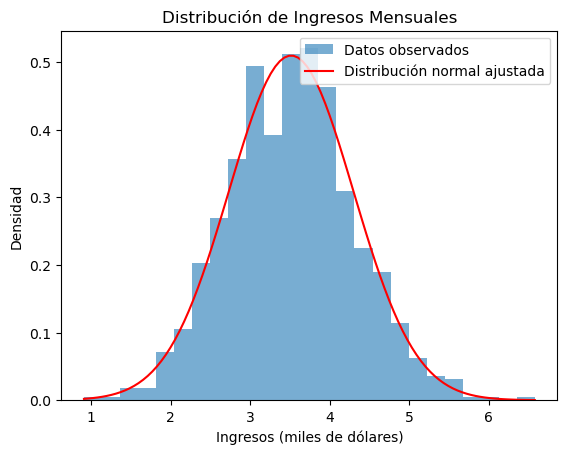

In [3]:
import matplotlib.pyplot as plt 

# Visualizar la distribución 
x = np.linspace(min(ingresos), max(ingresos), 100) 
pdf = stats.norm.pdf(x, mu, sigma) 

plt.hist(ingresos, bins=25, density=True, alpha=0.6, label="Datos observados") 
plt.plot(x, pdf, 'r-', label="Distribución normal ajustada") 
plt.title("Distribución de Ingresos Mensuales") 
plt.xlabel("Ingresos (miles de dólares)") 
plt.ylabel("Densidad") 
plt.legend() 
plt.show()

##### __Algoritmo 2: Prueba de Bondad de Ajuste (Kolmogorov-Smirnov)__

Para validar si los datos económicos se ajustan a una distribución teórica, como la normal, podemos usar pruebas de bondad de ajuste. La prueba de Kolmogorov-Smirnov (KS) compara la distribución empírica de los datos con una distribución teórica, ayudando a verificar supuestos econométricos. 

El siguiente ejemplo realiza una prueba KS para determinar si los residuos de un modelo (simulados aquí como normales) siguen una distribución normal. Un valor p mayor a 0.05 indica que no hay evidencia suficiente para rechazar la hipótesis de normalidad, un supuesto clave en muchos modelos econométricos, como la regresión lineal. Este tipo de validación es esencial para garantizar la robustez de los resultados.

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generar datos de ejemplo: Residuos de una regresión (simulados como normales)
np.random.seed(42)  # Para reproducibilidad
residuos = np.random.normal(loc=0, scale=1, size=1000)  # Media=0, desviación estándar=1, 100 observaciones

# Prueba de Kolmogorov-Smirnov contra una distribución normal
ks_stat, p_value = stats.kstest(residuos, 'norm', args=(np.mean(residuos), np.std(residuos)))

# Imprimir resultados
print("Prueba de Kolmogorov-Smirnov para normalidad de residuos:")
print(f"Estadístico KS: {ks_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value > 0.05:
    print("No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.")


Prueba de Kolmogorov-Smirnov para normalidad de residuos:
Estadístico KS: 0.0215
Valor p: 0.7370
No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.


Así como previamente nos ayudamos de una visualización en este caso también lo podemos hacer, es decir,  podemos gráficar los residuos con la densidad de la distribución normal ajustada, permitiendo evaluar si la suposición de normalidad es razonable. 

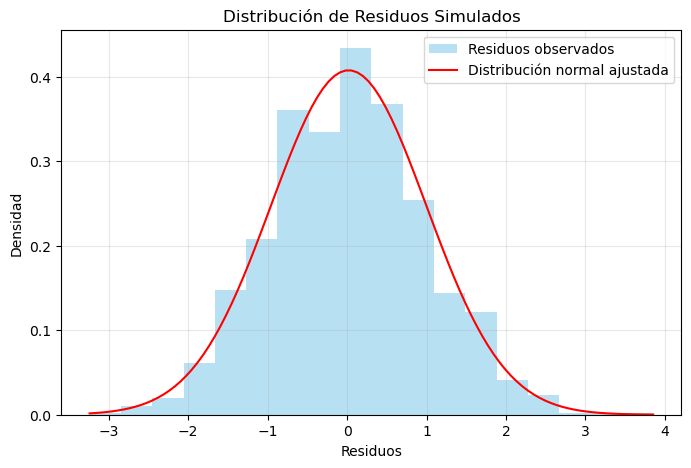

In [5]:
import matplotlib.pyplot as plt 

# Visualizar la distribución de los residuos
plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=18, density=True, alpha=0.6, color='skyblue', label="Residuos observados")
x = np.linspace(min(residuos), max(residuos), 100)
pdf = stats.norm.pdf(x, np.mean(residuos), np.std(residuos))
plt.plot(x, pdf, 'r-', label="Distribución normal ajustada")
plt.title("Distribución de Residuos Simulados")
plt.xlabel("Residuos")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 7.3 Algoritmos de regresión para análisis económico  

A continuación, exploraremos dos algoritmos de regresión fundamentales: la regresión lineal ordinaria (OLS), para variables continuas, y la regresión logística, para variables categóricas. Ambos se implementan en Python usando la librería “statsmodels”, y combinan métodos computacionales con los fundamentos probabilísticos discutidos en la sección anterior.  

##### __Algoritmo 1: Regresión Lineal Ordinaria (OLS)__

La regresión lineal ordinaria (OLS) modela la relación lineal entre una variable dependiente continua y una o más variables independientes. El modelo asume que los errores son normalmente distribuidos, con media cero y varianza constante (homoscedasticidad).

En el siguiente ejemplo, ajustamos un modelo OLS para predecir el PIB per cápita en función de la inversión. La salida de model.summary() proporciona los coeficientes (por ejemplo, cuánto aumenta el PIB por cada millón de dólares invertido), valores p (para evaluar significancia estadística) y estadísticas como R² (que mide el ajuste del modelo). La prueba de Kolmogorov-Smirnov (KS) verifica si los residuos son normalmente distribuidos, un supuesto clave del modelo. La visualización muestra la relación ajustada, ayudando a interpretar la dependencia entre las variables.

`!pip install statsmodels`

In [7]:
import pandas as pd  
import statsmodels.api as sm  
import matplotlib.pyplot as plt  
from scipy import stats 

# Datos de ejemplo: PIB per cápita (miles de dólares) vs. Inversión (millones de dólares) 
data = pd.DataFrame({ 
    'PIB_per_capita': [
        20.2, 25.1, 30.0, 28.4, 32.3, 22.5, 27.8, 31.2, 29.0, 33.5,
        21.7, 26.4, 30.8, 27.9, 34.1, 23.3, 28.6, 32.7, 26.5, 31.9,
        24.8, 29.2, 33.4, 25.7, 30.5, 22.9, 27.3, 31.8, 28.2, 32.6,
        20.9, 26.1, 30.4, 28.7, 33.2, 23.6, 28.0, 32.3, 27.1, 31.4,
        25.0, 29.5, 34.0, 26.3, 30.7, 22.4, 27.6, 32.1, 28.9, 33.8
    ], 
    'Inversion': [
        1000, 1500, 2000, 1800, 2200, 1100, 1600, 2100, 1700, 2300,
        1200, 1550, 2050, 1750, 2250, 1150, 1650, 2150, 1450, 1950,
        1300, 1850, 2350, 1400, 1900, 1050, 1500, 2000, 1700, 2200,
        950, 1450, 1950, 1750, 2150, 1250, 1600, 2100, 1350, 1850,
        1400, 1900, 2400, 1300, 1800, 1000, 1550, 2050, 1650, 2250
    ]
})

# Definir variables 
X = data['Inversion']  
y = data['PIB_per_capita']  
X = sm.add_constant(X) # Agregar intercepto 

# Ajustar modelo OLS 
model = sm.OLS(y, X).fit() 
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:         PIB_per_capita   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     856.7
Date:                Mon, 26 May 2025   Prob (F-statistic):           2.91e-32
Time:                        17:20:36   Log-Likelihood:                -63.346
No. Observations:                  50   AIC:                             130.7
Df Residuals:                      48   BIC:                             134.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7302      0.551     23.101      0.0

También podemos verificar el supuesto de normalidad de los erroes a través de la siguientes lineas de código 

In [9]:
# Verificar supuesto de normalidad de los errores 
residuos = model.resid  
ks_stat, p_value = stats.kstest(residuos, 'norm', args=(residuos.mean(), residuos.std())) 

print(f"\nPrueba KS para normalidad de residuos:")  
print(f"Estadístico KS: {ks_stat:.4f}, Valor p: {p_value:.4f}")  

if p_value > 0.05:  
    print("No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.")  
else:  
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.")  


Prueba KS para normalidad de residuos:
Estadístico KS: 0.0779, Valor p: 0.8989
No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.


Tal vez nos interese observar la línea de regresión así como la distribución de los datos, se puede graficar lo anterior con las siguientes líneas de código 

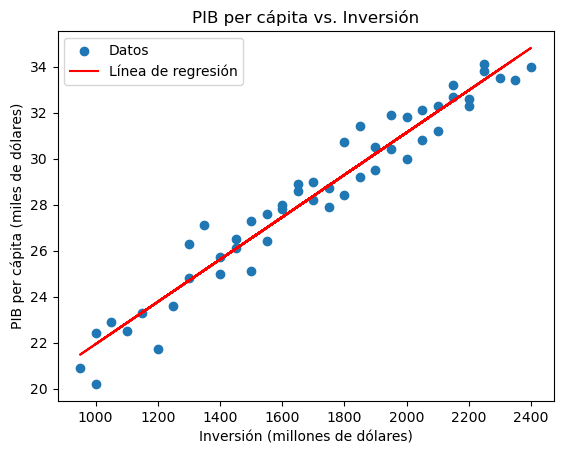

In [10]:
# Visualizar la regresión 

plt.scatter(data['Inversion'], data['PIB_per_capita'], label="Datos") 
plt.plot(data['Inversion'], model.predict(X), color='red', label="Línea de regresión") 
plt.title("PIB per cápita vs. Inversión") 
plt.xlabel("Inversión (millones de dólares)") 
plt.ylabel("PIB per cápita (miles de dólares)") 
plt.legend() 
plt.show() 

##### __Algoritmo 2: Regresión Logística__

La regresión logística se utiliza cuando la variable dependiente es categórica, típicamente binaria (por ejemplo, 0 o 1). En economía, es útil para modelar decisiones, como si un consumidor compra un producto (1) o no (0), en función de variables como el ingreso. 

El siguiente ejemplo ajusta un modelo logístico para predecir la probabilidad de compra en función del ingreso. La salida de model.summary() muestra los coeficientes, que indican cómo el ingreso afecta la log-odds de compra, y los valores p para evaluar significancia. La visualización grafica la probabilidad predicha, mostrando cómo aumenta con el ingreso. En este modelo, se asume que la variable dependiente sigue una distribución logística.

In [11]:
import pandas as pd  
import statsmodels.api as sm  
import matplotlib.pyplot as plt  
import numpy as np 

# Generar datos ficticios: Compra (1=sí, 0=no) vs. Ingreso (miles de dólares)
np.random.seed(42)  # Para reproducibilidad

n = 50  # Número de observaciones
ingreso = np.random.uniform(15, 50, n)  # Ingresos entre 15 y 50 mil dólares
# Generar probabilidades logísticas basadas en el ingreso
log_odds = -5 + 0.15 * ingreso  # Relación logística: log-odds = -5 + 0.15 * Ingreso
probs = 1 / (1 + np.exp(-log_odds))  # Probabilidad de Compra=1
compra = np.random.binomial(1, probs)  # Generar Compra (0 o 1) con probabilidad probs

# Crear DataFrame
data = pd.DataFrame({ 
    'Compra': compra,
    'Ingreso': np.round(ingreso, 2)  # Redondear ingresos a 2 decimales
})

# Definir variables  
X = data['Ingreso']  
y = data['Compra']  
X = sm.add_constant(X) 

# Ajustar modelo logístico  
model = sm.Logit(y, X).fit() 

# Imprimir resultados  
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.450920
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Compra   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 May 2025   Pseudo R-squ.:                  0.3300
Time:                        17:30:20   Log-Likelihood:                -22.546
converged:                       True   LL-Null:                       -33.651
Covariance Type:            nonrobust   LLR p-value:                 2.445e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8970      1.573     -3.749      0.000      -8.980      -2.814
Ingreso        0.1733      0.

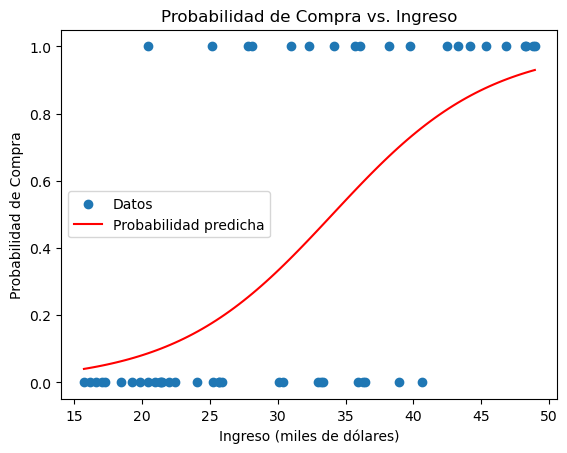

In [12]:
# Visualizar la probabilidad  
x_range = np.linspace(min(data['Ingreso']), max(data['Ingreso']), 100)  
X_range = sm.add_constant(x_range)  
probs = model.predict(X_range)

# hacer el plot  
plt.scatter(data['Ingreso'], data['Compra'], label="Datos")  
plt.plot(x_range, probs, color='red', label="Probabilidad predicha")  
plt.title("Probabilidad de Compra vs. Ingreso")  
plt.xlabel("Ingreso (miles de dólares)")  
plt.ylabel("Probabilidad de Compra")  
plt.legend() 
plt.show() 

Ambos algoritmos dependen de supuestos probabilísticos. En OLS, los errores deben ser normalmente distribuidos y homoscedásticos. En regresión logística, la relación entre las variables independientes y la log-odds debe ser lineal. La prueba KS en el primer ejemplo valida la normalidad de los residuos, mientras que, en la regresión logística, la inspección visual de las probabilidades predichas puede ayudar a evaluar el ajuste del modelo. Estos pasos son esenciales para garantizar que las estimaciones sean confiables. 

### 6.4 Modelos de Series Temporales 

Las series temporales son datos recopilados en intervalos de tiempo regulares, como el PIB trimestral, la inflación mensual o los precios diarios de acciones. En econometría, los modelos de series temporales permiten analizar patrones, tendencias y ciclos en estos datos, así como realizar predicciones sobre su comportamiento futuro. Estos modelos se basan en fundamentos probabilísticos, como la estacionariedad (propiedades estadísticas constantes en el tiempo) y la distribución de los errores, que son esenciales para garantizar estimaciones confiables.  

El siguiente ejemplo, código realiza los siguientes pasos:
 
- Prueba de estacionariedad: La prueba de Dickey-Fuller aumentada (ADF) evalúa si la serie de inflación es estacionaria (valor p < 0.05 indica estacionariedad). Si no lo es, el parámetro d=1 en ARIMA diferencia la serie para hacerla estacionaria.
- Ajuste del modelo: Se ajusta un modelo ARIMA(1,1,1) a los datos de inflación. La salida de model.summary() muestra los coeficientes AR y MA, su significancia (valores p), y estadísticas como el AIC para evaluar el ajuste.
- Validación de supuestos: La prueba de Kolmogorov-Smirnov (KS) verifica si los residuos son normalmente distribuidos, un supuesto clave para la validez del modelo.
- Predicciones: El modelo pronostica la inflación para los próximos tres meses, y la visualización compara los datos observados con los pronósticos.


In [6]:
import numpy as np
import pandas as pd  
import statsmodels.api as sm  
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller  
import matplotlib.pyplot as plt  
from scipy import stats 

# Generar datos ficticios: Inflación mensual (%) para 50 meses
np.random.seed(42)  # Para reproducibilidad
n = 50  # Número de observaciones
dates = pd.date_range('2020-01-31', periods=n, freq='ME')
# Generar inflación con una tendencia suave y ruido
trend = 0.02 * np.arange(n)  # Tendencia leve (0.02% por mes)
ruido = np.random.normal(0, 0.3, n)  # Ruido normal con desv. estándar 0.3
inflacion = 2.0 + trend + ruido  # Inflación base de 2.0%
inflacion = np.round(inflacion, 2)  # Redondear a 2 decimales

# Crear Serie
data = pd.Series(inflacion, index=dates)

# Verificar estacionariedad con la prueba de Dickey-Fuller aumentada 
result = adfuller(data)  
print(f"Estadístico ADF: {result[0]:.4f}, Valor p: {result[1]:.4f}")  

if result[1] > 0.05:  
    print("No se rechaza la hipótesis nula: la serie no es estacionaria.")  
else:  
    print("Se rechaza la hipótesis nula: la serie es estacionaria.") 

# Ajustar modelo ARIMA(1,1,1) 
model = ARIMA(data, order=(1, 1, 1)).fit() 

# Imprimir resultados 
print(model.summary())

Estadístico ADF: -0.7841, Valor p: 0.8237
No se rechaza la hipótesis nula: la serie no es estacionaria.
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -10.804
Date:                Tue, 27 May 2025   AIC                             27.607
Time:                        09:18:49   BIC                             33.283
Sample:                    01-31-2020   HQIC                            29.761
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0254      0.247     -0.103      0.918      -0.509       0.458
ma.L1         -0.7795      

El modelo ARIMA asume que los errores son normalmente distribuidos y no autocorrelacionados. La prueba KS en el ejemplo valida la normalidad, mientras que herramientas como el correlograma (ACF) de los residuos (disponible en statsmodels) pueden verificar la ausencia de autocorrelación.

In [8]:
# Verificar normalidad de los residuos 
residuos = model.resid 

ks_stat, p_value = stats.kstest(residuos, 'norm', args=(residuos.mean(), residuos.std()))  
print(f"\nPrueba KS para normalidad de residuos:")  
print(f"Estadístico KS: {ks_stat:.4f}, Valor p: {p_value:.4f}")  

if p_value > 0.05:  
    print("No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.")  
else:  
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.") 

# Predecir los próximos 3 meses 
forecast = model.forecast(steps=3)  
print(f"\nPronósticos para los próximos 3 meses:\n{forecast}") 


Prueba KS para normalidad de residuos:
Estadístico KS: 0.1313, Valor p: 0.3260
No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.

Pronósticos para los próximos 3 meses:
2024-03-31    2.791005
2024-04-30    2.782347
2024-05-31    2.782567
Freq: ME, Name: predicted_mean, dtype: float64


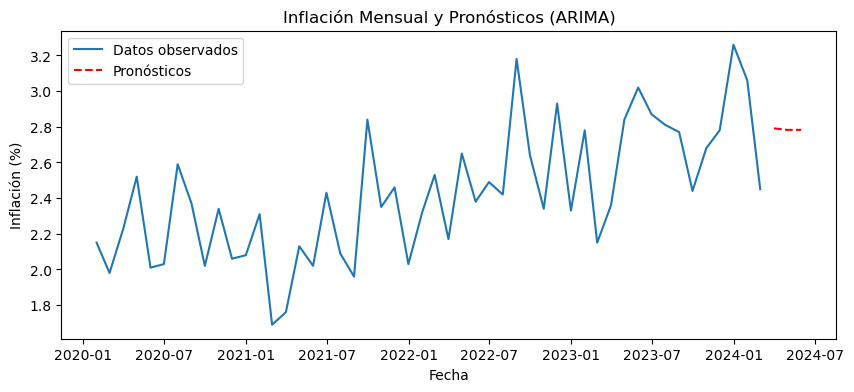

In [11]:
#Visualizar datos y predicciones 

plt.figure(figsize=(10, 4))
plt.plot(data, label="Datos observados")  
plt.plot(forecast.index, forecast, 'r--', label="Pronósticos")  
plt.title("Inflación Mensual y Pronósticos (ARIMA)")  
plt.xlabel("Fecha")  
plt.ylabel("Inflación (%)")  
plt.legend() 
plt.show() 

### 6. 5 Simulaciones y Análisis de Riesgo  

En economía, la incertidumbre es una característica inherente de fenómenos como los retornos financieros, los precios de mercado o los efectos de políticas económicas. Los algoritmos de simulación, como el método de Monte Carlo, permiten modelar esta incertidumbre generando escenarios aleatorios basados en distribuciones estadísticas, como la normal o log-normal, que son fundamentales en econometría. Estas simulaciones nos ayudan a estimar riesgos, evaluar resultados probables y tomar decisiones informadas. 

El método de Monte Carlo genera múltiples trayectorias de una variable aleatoria, basándose en sus propiedades probabilísticas, para calcular métricas como el Valor en Riesgo (VaR), que mide la pérdida máxima esperada de una inversión con un nivel de confianza dado. Este enfoque combina los fundamentos probabilísticos discutidos en la sección 7.2 (como las distribuciones) con algoritmos computacionales, alineándose con el rigor de especificación probabilística propuesto por Aris Spanos. En este subcapítulo, implementaremos un algoritmo de Monte Carlo en Python para estimar el VaR  de una cartera de inversión, validando los supuestos probabilísticos subyacentes y visualizando los resultados.

#### __Simulación de Monte Carlo para el Valor en Riesgo (VaR)__

El método de Monte Carlo simula múltiples escenarios de una variable económica (por ejemplo, retornos de una cartera) utilizando una distribución estadística, como la log-normal, que es común en finanzas debido a la naturaleza positiva y asimétrica de los retornos. El algoritmo implica: (1) definir los parámetros de la distribución, (2) generar simulaciones aleatorias, (3) calcular los valores finales de la cartera, y (4) estimar el VaR.

El siguiente ejemplo en Python, realiza los siguientes pasos:

- Simulación de retornos: Genera 10,000 trayectorias de retornos diarios usando una distribución log-normal, que es adecuada para retornos financieros debido a su asimetría positiva.
- Cálculo de valores finales: Calcula el valor final de la cartera para cada simulación, asumiendo una inversión inicial de $1,000.
- Estimación del VaR: Calcula el VaR al 5%, que representa la pérdida máxima esperada con un 95% de confianza.
- Validación probabilística: La prueba de Kolmogorov-Smirnov (KS) verifica si los retornos totales simulados son consistentes con una distribución normal (aunque la distribución log-normal se usa para los retornos diarios, los retornos acumulados tienden a la normalidad por el teorema central del límite).
- Visualización: El histograma muestra la distribución de los valores finales de la cartera, con una línea que indica el VaR al 5%, facilitando la interpretación del riesgo.


In [25]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import stats 

# Parámetros de la simulación 
mu = 0.05 # Retorno esperado anual  
sigma = 0.2 # Volatilidad anual  
n_simulaciones = 10_000 # Número de simulaciones  
n_dias = 252 # Días hábiles en un año  
inversion_inicial = 1000 # Inversión inicial en dólares 

# Simular retornos diarios con una distribución log-normal 
np.random.seed(42) # Para reproducibilidad  

retornos_diarios = np.random.lognormal(mean=mu/n_dias, sigma=sigma/np.sqrt(n_dias), size=(n_simulaciones, n_dias)) 

# Calcular valores finales de la cartera 
valores_finales = inversion_inicial * np.exp(np.sum(np.log(retornos_diarios), axis=1)) 

# Calcular VaR al 5% 
VaR_5 = np.percentile(valores_finales - inversion_inicial, 5)  

print(f"Valor en Riesgo (VaR) al 5%: ${-VaR_5:.2f}") 

Valor en Riesgo (VaR) al 5%: $247.08


In [26]:
# Verificar la distribución de los retornos simulados 

retornos_totales = np.sum(np.log(retornos_diarios), axis=1)  
ks_stat, p_value = stats.kstest(retornos_totales, 'norm', args=(retornos_totales.mean(), retornos_totales.std()))  

print(f"\nPrueba KS para normalidad de retornos totales:")  
print(f"Estadístico KS: {ks_stat:.4f}, Valor p: {p_value:.4f}")  

if p_value > 0.05:  
     print("No se rechaza la hipótesis nula: los retornos totales son consistentes con una distribución normal.")  
else:  
    print("Se rechaza la hipótesis nula: los retornos totales no siguen una distribución normal.") 


Prueba KS para normalidad de retornos totales:
Estadístico KS: 0.0092, Valor p: 0.3657
No se rechaza la hipótesis nula: los retornos totales son consistentes con una distribución normal.


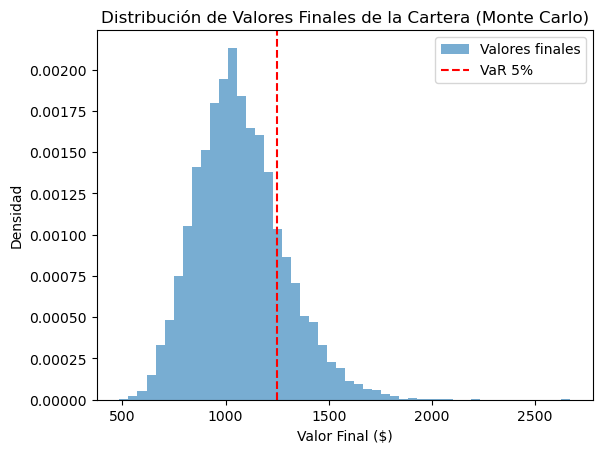

In [28]:
# Visualizar la distribución de valores finales 

plt.hist(valores_finales, bins=50, density=True, alpha=0.6, label="Valores finales") 
plt.axvline(inversion_inicial - VaR_5, color='red', linestyle='--', label='VaR 5%') 
plt.title("Distribución de Valores Finales de la Cartera (Monte Carlo)")  
plt.xlabel("Valor Final ($)") 
plt.ylabel("Densidad")  
plt.legend()  
plt.show() 

### 6. 6 Validación de Supuestos Probabilísticos 

En esta sección, exploraremos algoritmos para validar tres supuestos probabilísticos comunes: (1) normalidad de los residuos, (2) homoscedasticidad, y (3) ausencia de autocorrelación en los errores. Implementaremos pruebas estadísticas, como la prueba de Shapiro-Wilk para normalidad, la prueba de Breusch-Pagan para homoscedasticidad, y el correlograma para autocorrelación. Aplicaremos estas pruebas a un modelo de regresión lineal, conectando con ejemplos económicos como el análisis del PIB per cápita y la inversión.

##### Algoritmo 1: Prueba de Normalidad de los Residuos (Shapiro-Wilk) 

Muchos modelos econométricos, como la regresión lineal ordinaria (OLS) y ARIMA, asumen que los residuos (diferencias entre los valores observados y predichos) siguen una distribución normal. La prueba de Shapiro-Wilk evalúa si una muestra es consistente con una distribución normal, proporcionando un estadístico y un valor p.

El siguiente ejemplo en Python, ajusta una regresión lineal para predecir el PIB per cápita en función de la inversión y aplica la prueba de Shapiro-Wilk a los residuos. Un valor p mayor a 0.05 indica que no hay evidencia suficiente para rechazar la hipótesis de normalidad, lo que valida el supuesto del modelo OLS. La visualización compara el histograma de los residuos con una distribución normal ajustada, ayudando a evaluar visualmente el supuesto. 

Nota: Debido al pequeño tamaño de la muestra en este ejemplo, la prueba de Shapiro-Wilk puede tener poca potencia; en datos reales con más observaciones, sería más robusta.

In [29]:
import pandas as pd  
import statsmodels.api as sm  
from scipy import stats  
import matplotlib.pyplot as plt 

# Generar datos ficticios: PIB per cápita (miles de dólares) vs. Inversión (millones de dólares)
np.random.seed(42)  # Para reproducibilidad
n = 500  # Número de observaciones
inversion = np.random.uniform(500, 3000, n)  # Inversión entre 500 y 3000 millones
error = np.random.normal(0, 2, n)  # Errores normales con desv. estándar 2
pib_per_capita = 10 + 0.01 * inversion + error  # Relación lineal con ruido
pib_per_capita = np.round(pib_per_capita, 2)  # Redondear a 2 decimales

# Crear DataFrame
data = pd.DataFrame({'PIB_per_capita': pib_per_capita, 'Inversion': inversion})

# Ajustar modelo OLS  
X = data['Inversion']  
y = data['PIB_per_capita']  
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit() 

# Obtener residuos 
residuos = model.resid 

# Prueba de Shapiro-Wilk para normalidad  
shapiro_stat, p_value = stats.shapiro(residuos)  

print(f"Prueba de Shapiro-Wilk para normalidad de residuos:")  
print(f"Estadístico: {shapiro_stat:.4f}, Valor p: {p_value:.4f}") 

if p_value > 0.05:  
    print("No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.")  
else:  
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.") 

Prueba de Shapiro-Wilk para normalidad de residuos:
Estadístico: 0.9968, Valor p: 0.4421
No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.


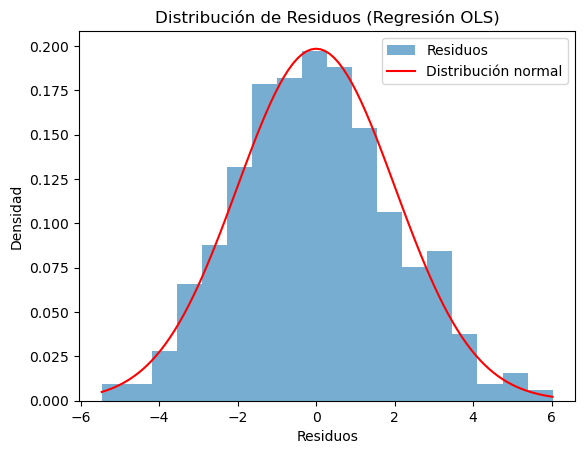

In [30]:
# Visualizar distribución de los residuos  

plt.hist(residuos, bins=18, density=True, alpha=0.6, label="Residuos")  
x = np.linspace(min(residuos), max(residuos), 100)  
plt.plot(x, stats.norm.pdf(x, residuos.mean(), residuos.std()), 'r-', label="Distribución normal")  
plt.title("Distribución de Residuos (Regresión OLS)")  
plt.xlabel("Residuos")  
plt.ylabel("Densidad")  
plt.legend()  
plt.show() 

#### Algoritmo 2: Prueba de Homoscedasticidad (Breusch-Pagan) 

La homoscedasticidad implica que la varianza de los residuos es constante en todos los niveles de las variables independientes. Si la varianza varía (heteroscedasticidad), las estimaciones de OLS siguen siendo insesgadas, pero los errores estándar pueden ser incorrectos, afectando la inferencia. La prueba de Breusch-Pagan evalúa si la varianza de los residuos depende de las variables independientes.

En el siguiente ejemplo, aplicamos la prueba de Breusch-Pagan al modelo OLS. Un valor p mayor a 0.05 sugiere que los residuos son homoscedásticos, validando el supuesto. La gráfica de residuos frente a valores predichos permite inspeccionar visualmente si la dispersión de los residuos es constante (homoscedasticidad) o varía (heteroscedasticidad). Si se detecta heteroscedasticidad, podríamos usar errores estándar robustos o un modelo alternativo.

In [31]:
import statsmodels.stats.diagnostic as smd 

bp_test = smd.het_breuschpagan(model.resid, model.model.exog)  
labels = ['Estadístico LM', 'Valor p LM', 'Estadístico F', 'Valor p F']  

print(f"Prueba de Breusch-Pagan para homoscedasticidad:")  

for label, value in zip(labels, bp_test):   
    print(f"{label}: {value:.4f}")  
    if bp_test[1] > 0.05:  
        print("No se rechaza la hipótesis nula: los residuos son homoscedásticos.")  
    else:  
        print("Se rechaza la hipótesis nula: los residuos son heteroscedásticos.") 


Prueba de Breusch-Pagan para homoscedasticidad:
Estadístico LM: 1.1485
No se rechaza la hipótesis nula: los residuos son homoscedásticos.
Valor p LM: 0.2839
No se rechaza la hipótesis nula: los residuos son homoscedásticos.
Estadístico F: 1.1465
No se rechaza la hipótesis nula: los residuos son homoscedásticos.
Valor p F: 0.2848
No se rechaza la hipótesis nula: los residuos son homoscedásticos.


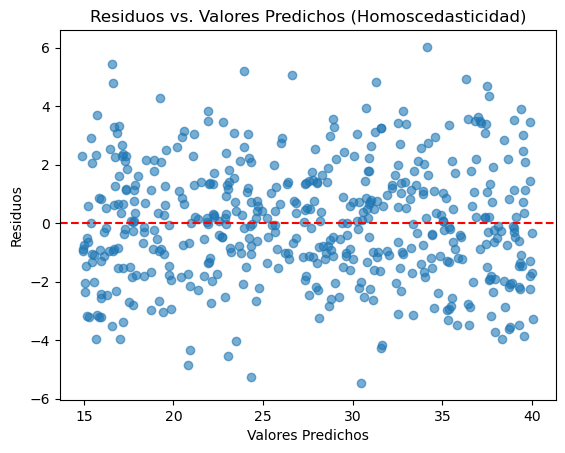

In [32]:

plt.scatter(model.fittedvalues, model.resid, alpha=0.6) 
plt.axhline(0, color='red', linestyle='--') 
plt.title("Residuos vs. Valores Predichos (Homoscedasticidad)") 
plt.xlabel("Valores Predichos")  
plt.ylabel("Residuos")  
plt.show() 

#### Algoritmo 3: Prueba de Ausencia de Autocorrelación (gráfico de autocorrelación)

En series temporales o datos de panel, los residuos no deben estar autocorrelacionados, es decir, no deben mostrar dependencia con sus valores anteriores. La autocorrelación puede invalidar las inferencias en modelos como OLS o ARIMA. El gráfico de autocorrelación (gráfico de la función de autocorrelación, ACF) ayuda a evaluar visualmente la autocorrelación de los residuos.

En el siguiente ejemplo, generamos un gráfico de autocorrelación de los residuos del modelo OLS, mostrando las correlaciones de los residuos con sus propios valores retardados (hasta 3 rezagos). Las barras dentro de las bandas de confianza (áreas sombreadas) indican que no hay autocorrelación significativa, validando el supuesto. 
Nota: Este ejemplo usa datos de corte transversal, donde la autocorrelación es menos común.

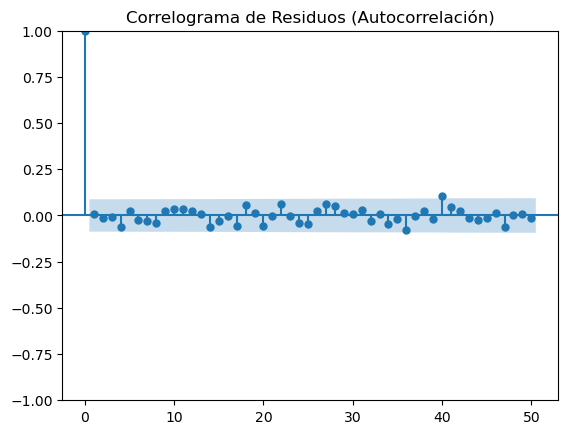

In [33]:
from statsmodels.graphics.tsaplots import plot_acf 

# Usar los residuos del modelo OLS anterior 
# Graficar correlograma 
plot_acf(residuos, lags=50, alpha=0.05) 
plt.title("Correlograma de Residuos (Autocorrelación)") 
plt.show() 

### 6. 7 Aplicaciones Prácticas en Economía 

En los subcapítulos anteriores, hemos explorado algoritmos y fundamentos probabilísticos esenciales para el análisis econométrico, incluyendo distribuciones estadísticas (sección 7.2), regresiones (sección 7.3), modelos de series temporales (sección 7.4), simulaciones de Monte Carlo (sección 7.5), y validación de supuestos probabilísticos (sección 7.6). En este subcapítulo final, integraremos estos métodos en un caso práctico que analiza el impacto de la innovación tecnológica, medida por el número de patentes registradas, en el PIB per cápita de un país. Este análisis combina regresión lineal para estimar relaciones, un modelo ARIMA para predecir tendencias, una simulación de Monte Carlo para evaluar incertidumbre, y pruebas de supuestos para garantizar la validez de los resultados.
 
El caso práctico se basa en un conjunto de datos ficticio que refleja la relación entre patentes y PIB per cápita, inspirado en temas de innovación y crecimiento económico. Usaremos Python con librerías como statsmodels, scipy, y matplotlib para implementar los algoritmos, validar supuestos probabilísticos, y visualizar resultados, proporcionando un ejemplo integral que conecta la teoría con la práctica.

#### Caso práctico: Impacto de las patentes en el PIB per cápita 

  

Supongamos que tenemos datos anuales de un país para los años 2015-2024, con el PIB per cápita (en miles de dólares) y el número de patentes registradas (en miles). Queremos: (1) estimar cómo las patentes afectan el PIB per cápita usando regresión lineal, (2) predecir el PIB per cápita futuro con un modelo ARIMA, (3) simular escenarios de crecimiento del PIB bajo incertidumbre con Monte Carlo, y (4) validar los supuestos probabilísticos de los modelos. 

##### Paso 1: Regresión Lineal (OLS) 

Comenzaremos ajustando una regresión lineal para modelar la relación entre el PIB per cápita y las patentes, validando los supuestos de normalidad y homoscedasticidad. En el siguiente ejemplo, ajustamos una regresión lineal para estimar cómo las patentes afectan el PIB per cápita. La salida de model.summary() muestra el coeficiente de las patentes (por ejemplo, cuánto aumenta el PIB por cada mil patentes adicionales) y su significancia (valor p). Las pruebas de Shapiro-Wilk y Breusch-Pagan validan los supuestos de normalidad y homoscedasticidad, asegurando la fiabilidad del modelo. La visualización muestra la relación ajustada, útil para interpretar el impacto de la innovación.

In [34]:
import pandas as pd  
import statsmodels.api as sm  
from scipy import stats  
import matplotlib.pyplot as plt  
import statsmodels.stats.diagnostic as smd 

# Generar datos ficticios: PIB per cápita (miles de dólares) y Patentes (miles)  
np.random.seed(42)  # Para reproducibilidad
n = 50  # Número de observaciones
años = list(range(1975, 2025))  # Años de 1975 a 2024
# Generar Patentes con tendencia creciente y ruido
patentes = 0.5 + 0.05 * np.arange(n) + np.random.normal(0, 0.2, n)
patentes = np.round(np.clip(patentes, 0.5, 3.0), 2)  # Limitar entre 0.5 y 3.0
# Generar PIB per cápita con relación lineal y ruido
pib_base = 10 + 0.4 * np.arange(n)  # Tendencia base
pib_noise = np.random.normal(0, 1.5, n)  # Ruido
pib_per_capita = pib_base + 3 * patentes + pib_noise
pib_per_capita = np.round(np.clip(pib_per_capita, 10, 30), 2)  # Limitar entre 10 y 30

# Crear DataFrame
data = pd.DataFrame({
    'Año': años,
    'PIB_per_capita': pib_per_capita,
    'Patentes': patentes
})
# Ajustar modelo OLS  
X = data['Patentes']  
y = data['PIB_per_capita']  
X = sm.add_constant(X)  

model = sm.OLS(y, X).fit() 

# Imprimir resultados  
print("Resultados de la regresión OLS:") 
print(model.summary()) 


Resultados de la regresión OLS:
                            OLS Regression Results                            
Dep. Variable:         PIB_per_capita   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     327.6
Date:                Tue, 27 May 2025   Prob (F-statistic):           4.41e-23
Time:                        13:15:20   Log-Likelihood:                -110.86
No. Observations:                  50   AIC:                             225.7
Df Residuals:                      48   BIC:                             229.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.792

In [35]:
# Validar normalidad (Shapiro-Wilk)  
residuos = model.resid  
shapiro_stat, p_value = stats.shapiro(residuos)  

print(f"\nPrueba de Shapiro-Wilk para normalidad:")  
print(f"Estadístico: {shapiro_stat:.4f}, Valor p: {p_value:.4f}")  

if p_value > 0.05:  
    print("No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.")  
else:  
    print("Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.") 


Prueba de Shapiro-Wilk para normalidad:
Estadístico: 0.9796, Valor p: 0.5356
No se rechaza la hipótesis nula: los residuos son consistentes con una distribución normal.


In [36]:
# Validar homoscedasticidad (Breusch-Pagan)  

bp_test = smd.het_breuschpagan(residuos, model.model.exog)  

print(f"\nPrueba de Breusch-Pagan para homoscedasticidad:")  
print(f"Valor p LM: {bp_test[1]:.4f}")  

if bp_test[1] > 0.05:  
    print("No se rechaza la hipótesis nula: los residuos son homoscedásticos.")  
else:  
    print("Se rechaza la hipótesis nula: los residuos son heteroscedásticos.") 


Prueba de Breusch-Pagan para homoscedasticidad:
Valor p LM: 0.8989
No se rechaza la hipótesis nula: los residuos son homoscedásticos.


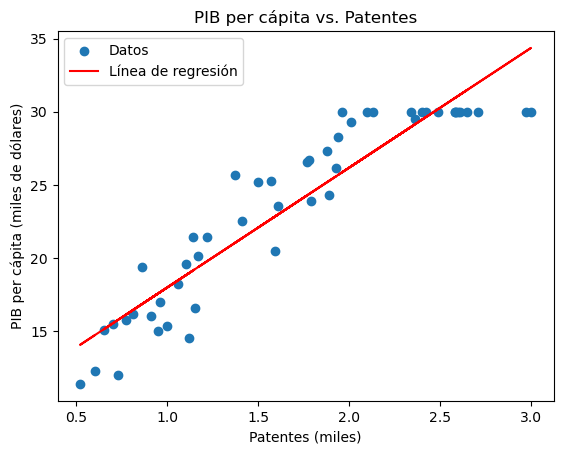

In [37]:
# Visualizar regresión  
plt.scatter(data['Patentes'], data['PIB_per_capita'], label="Datos") 
plt.plot(data['Patentes'], model.predict(X), color='red', label="Línea de regresión") 
plt.title("PIB per cápita vs. Patentes")  
plt.xlabel("Patentes (miles)")  
plt.ylabel("PIB per cápita (miles de dólares)")  
plt.legend() 
plt.show() 

##### Paso 2: Modelo ARIMA para predicción 

Ahora, usaremos un modelo ARIMA para predecir el PIB per cápita en los próximos tres años, basándonos en su evolución temporal. En el siguiente ejemplo, ajustamos un modelo ARIMA(1,1,1) a la serie temporal del PIB per cápita, verificando primero la estacionariedad con la prueba de Dickey-Fuller. La salida muestra los coeficientes y su significancia, mientras que las predicciones para 2025-2027 proyectan el crecimiento futuro. La visualización compara los datos observados con los pronósticos, útil para evaluar tendencias económicas.

In [38]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller 

# Configurar datos como serie temporal 
data['Año'] = pd.to_datetime(data['Año'], format='%Y') 
data.set_index('Año', inplace=True) 

# Especificar frecuencia anual explícitamente (AS = Annual Start)
data = data.asfreq('YS')  # 'YS' es equivalente a 'AS' (Año que comienza en Enero)
serie = data['PIB_per_capita'] 

# Verificar estacionariedad (prueba de Dickey-Fuller) 
result = adfuller(serie) 
print(f"\nPrueba de Dickey-Fuller para estacionariedad:") 
print(f"Valor p: {result[1]:.4f}") 

if result[1] > 0.05: 
    print("No se rechaza la hipótesis nula: la serie no es estacionaria.") 
else: 
    print("Se rechaza la hipótesis nula: la serie es estacionaria.") 



Prueba de Dickey-Fuller para estacionariedad:
Valor p: 0.3587
No se rechaza la hipótesis nula: la serie no es estacionaria.


In [39]:
# Ajustar modelo ARIMA(1,1,1) 
model_arima = ARIMA(serie, order=(1, 1, 1)).fit() 
print("\nResultados del modelo ARIMA:") 
print(model_arima.summary()) 

# Predecir los próximos 3 años 
forecast = model_arima.forecast(steps=3) 
print(f"\nPronósticos para 2025-2027:\n{forecast}") 


Resultados del modelo ARIMA:
                               SARIMAX Results                                
Dep. Variable:         PIB_per_capita   No. Observations:                   50
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -95.844
Date:                Tue, 27 May 2025   AIC                            197.687
Time:                        13:15:48   BIC                            203.363
Sample:                    01-01-1975   HQIC                           199.841
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1825      0.361     -0.505      0.613      -0.890       0.525
ma.L1         -0.2690      0.413     -0.651      0.515      -1.079       0.541
sigma2         2.9152 

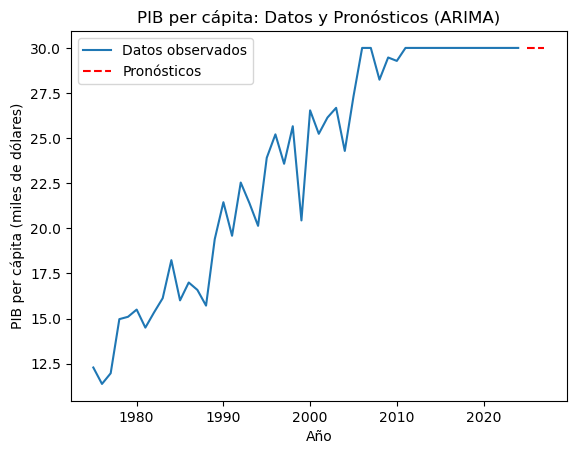

In [40]:
# Visualizar datos y predicciones 
plt.plot(serie, label="Datos observados") 
plt.plot(forecast.index, forecast, 'r--', label="Pronósticos") 
plt.title("PIB per cápita: Datos y Pronósticos (ARIMA)") 
plt.xlabel("Año") 
plt.ylabel("PIB per cápita (miles de dólares)") 
plt.legend() 
plt.show() 

#### Paso 3: Simulación de Monte Carlo para incertidumbre 

Para modelar la incertidumbre en el crecimiento del PIB per cápita, simularemos escenarios futuros usando Monte Carlo, asumiendo que los log-retornos anuales del PIB son normalmente distribuidos, lo que genera valores de PIB log-normales.

En el siguiente ejemplo, simulamos 10,000 escenarios para el PIB per cápita en 2027, usando una distribución log-normal para los valores finales (ya que los log-retornos son normales). El intervalo de confianza del 90% indica el rango probable del PIB, reflejando la incertidumbre en el crecimiento económico. La visualización muestra la distribución de los valores simulados, destacando los percentiles 5% y 95%.


Simulación de Monte Carlo:
Intervalo de confianza del 90% para el PIB per cápita en 2027: [28.52, 37.81] mil dólares


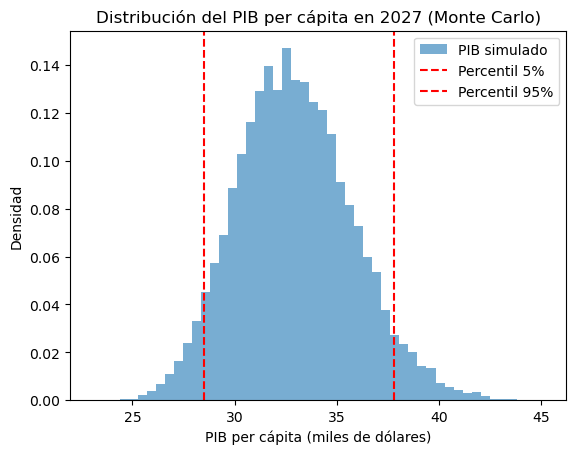

In [44]:
import numpy as np 
import matplotlib.pyplot as plt  # Added missing import for plt

# Parámetros de la simulación 
mu = 0.03 # Tasa de crecimiento anual esperada (log-retorno)  
sigma = 0.05 # Volatilidad anual  
n_simulaciones = 10000  
n_años = 3  
pib_inicial = 30 # PIB per cápita en 2024 (miles de dólares) 
 
# Simular log-retornos anuales  
np.random.seed(42)  
log_retornos = np.random.normal(mu, sigma, (n_simulaciones, n_años))  
pib_final = pib_inicial * np.exp(np.sum(log_retornos, axis=1)) 

# Calcular intervalo de confianza del 90%  
pib_lower = np.percentile(pib_final, 5)  
pib_upper = np.percentile(pib_final, 95)  
print(f"\nSimulación de Monte Carlo:")  
print(f"Intervalo de confianza del 90% para el PIB per cápita en 2027: [{pib_lower:.2f}, {pib_upper:.2f}] mil dólares") 
 
# Visualizar distribución de PIB simulado  
# Fixed the syntax error by properly formatting the multi-line statements
plt.hist(pib_final, bins=50, density=True, alpha=0.6, label="PIB simulado") 
plt.axvline(pib_lower, color='red', linestyle='--', label='Percentil 5%') 
plt.axvline(pib_upper, color='red', linestyle='--', label='Percentil 95%') 
plt.title("Distribución del PIB per cápita en 2027 (Monte Carlo)")  
plt.xlabel("PIB per cápita (miles de dólares)")  
plt.ylabel("Densidad")  
plt.legend()  
plt.show()

#### Paso 4: Conexión con fundamentos probabilísticos 

Las pruebas de normalidad, homoscedasticidad y estacionariedad aplicadas en los pasos anteriores aseguran que los modelos cumplen los supuestos probabilísticos requeridos. La elección de la distribución log-normal en la simulación de Monte Carlo refleja la naturaleza positiva y asimétrica del PIB per cápita. 
Este análisis muestra que:
- La regresión lineal sugiere que un aumento en las patentes está asociado con un mayor PIB per cápita, con supuestos probabilísticos validados.
- El modelo ARIMA proyecta un crecimiento continuo del PIB, útil para planificar políticas económicas.
- La simulación de Monte Carlo cuantifica la incertidumbre, proporcionando un rango probable para el PIB futuro.
- Las validaciones probabilísticas garantizan la robustez de los resultados, reforzando la importancia de la especificación.

Este caso práctico ilustra cómo los algoritmos y fundamentos probabilísticos se combinan para abordar problemas económicos complejos, como el impacto de la innovación en el crecimiento, ofreciendo herramientas prácticas para la investigación, toma de decisiones, o la implementación de políticas públicas
